In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import neighbors

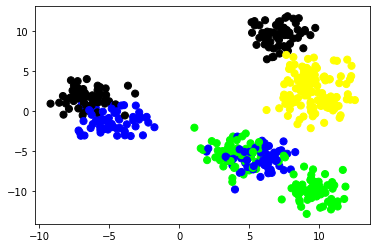

In [231]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
X_D2, y_D2 = make_blobs(n_samples = 500, n_features = 2,  centers = 8, cluster_std = 1.3, random_state = 4)
plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf = neighbors.KNeighborsClassifier(n_neighbors=37, weights='distance') 
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print('KNN ', clf)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

KNN  KNeighborsClassifier(n_neighbors=37, weights='distance')
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.89


# Task 1

In [234]:
print('Матрица ошибок:\n',confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test, predictions))

Матрица ошибок:
 [[13  2  0  0  0  0  0  0]
 [ 3 14  0  0  0  0  0  0]
 [ 0  0 11  0  0  3  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0 11  0  0  0]
 [ 0  0  3  0  0  8  0  0]
 [ 0  0  0  0  0  0 18  0]
 [ 0  0  0  0  3  0  0 20]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.88      0.82      0.85        17
           2       0.79      0.79      0.79        14
           3       1.00      1.00      1.00        16
           4       0.79      1.00      0.88        11
           5       0.73      0.73      0.73        11
           6       1.00      1.00      1.00        18
           7       1.00      0.87      0.93        23

    accuracy                           0.89       125
   macro avg       0.87      0.88      0.88       125
weighted avg       0.89      0.89      0.89       125



# Task 2

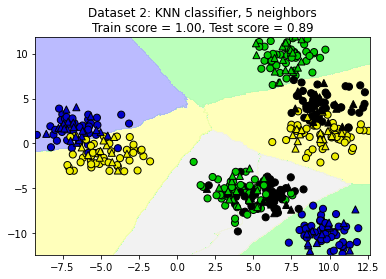

In [235]:
from adspy_shared_utilities import plot_class_regions_for_classifier
plot_class_regions_for_classifier(clf,X_train,y_train, X_test, y_test, 'Dataset 2: KNN classifier, 5 neighbors')

# Task 3 Перекресная проверка

Здесь мы ищем наилучий k

In [223]:
from sklearn.model_selection import cross_val_score

neighbors = []
cv_scores = []

for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,X_train,y_train,cv = 10, scoring= 'accuracy')
    cv_scores.append(scores.mean())
    
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring= 'accuracy')
print('Accuracy',scores)

[0.76315789 0.81578947 0.89473684 0.92105263 0.92105263 0.81081081
 0.89189189 0.94594595 0.86486486 0.86486486]


Оптимальное число соседей k = 37 


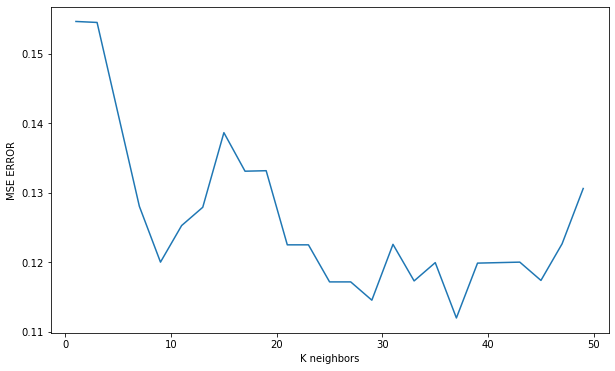

In [226]:
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('Оптимальное число соседей k = %d ' %optimal_k)

plt.figure(figsize= (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('K neighbors')
plt.ylabel('MSE ERROR')
plt.show()

# Task 4 не менее 97%

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# print('Data',cancer.data)
# print('\n')
# print('',cancer.target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.33,random_state = 1)

In [250]:
neighbors = []
cv_scores = []

for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,X_train,y_train,cv = 10, scoring= 'accuracy')
    #стандартное отклонение
    cv_scores.append(scores.mean())
    
    
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring= 'accuracy')
print('Accuracy',scores)

Accuracy [0.92307692 0.89473684 0.89473684 0.97368421 0.94736842 0.92105263
 0.94736842 0.97368421 0.94736842 0.94736842]


Оптимальное число соседей k = 15 


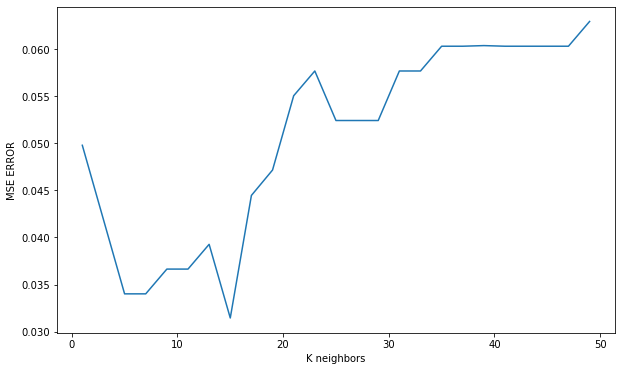

In [251]:
#Cюда запишем среднее
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]#минимальная среднеквадратичная ошибка
print('Оптимальное число соседей k = %d ' %optimal_k)

plt.figure(figsize= (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('K neighbors')
plt.ylabel('MSE ERROR')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [8]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))


# print('KNN ', knn)
# print('Accuracy of KNN classifier on training set: {:.2f}'
#      .format(knn.score(X_train, y_train)))
# print('Accuracy of KNN classifier on test set: {:.2f}'
#      .format(knn.score(X_test, y_test)))

[[ 59   6]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        65
           1       0.95      1.00      0.98       123

    accuracy                           0.97       188
   macro avg       0.98      0.95      0.96       188
weighted avg       0.97      0.97      0.97       188

